In [ ]:
# los ultimos dos scripts son los 'utiles': las funciones y un ejemplo de como usarlas.
#Todos los anteriores son de prueba, digamos.

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Users\Patri\AppData\Local\Tesseract-OCR\tesseract.exe'

In [ ]:
#tomo imagenes
img1 = cv.cvtColor(cv.imread('letras1.png'), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread('nros1.png'), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread('paint1.png'), cv.COLOR_BGR2GRAY)

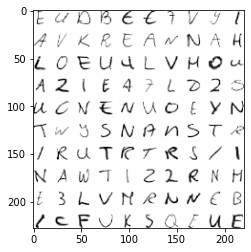

In [ ]:
#juego con la primera y sus transformaciones: threshold y despues binary/gaussian, erode, dilatation, tamaño del kernel
a = range(30)
subim1 = img1[:,:]
plt.imshow(subim1,'gray')

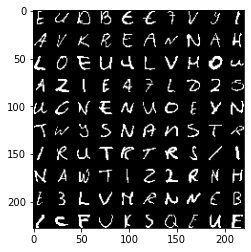

In [ ]:
ret,thresh1 = cv.threshold(subim1,200,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C)
plt.imshow(thresh1,'gray')

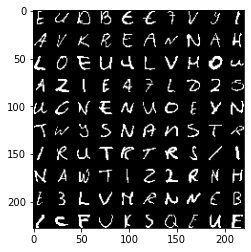

In [ ]:
kernel = np.ones((1,1),np.uint8) #me pa que es la misma imagen si el kernel es de 1x1
erosion = cv.erode(thresh1,kernel,iterations = 1)
plt.imshow(erosion,'gray')

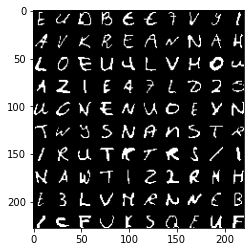

In [ ]:
kernel = np.ones((2,2),np.uint8)
closing = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,'gray')

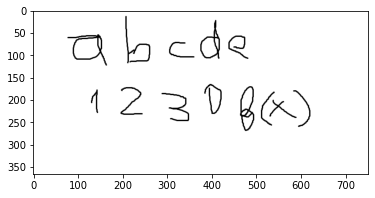

In [ ]:
#otra mas parecida a las q vamos a tener de input
plt.imshow(img3,'gray')

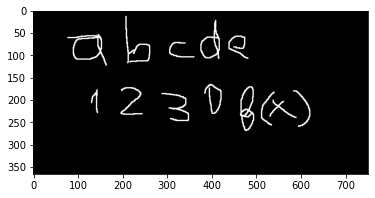

In [ ]:
ret,thresh3 = cv.threshold(img3,220,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C) #o THRESH:BINARY_INV; el '220' es aprox, a ojo
plt.imshow(thresh3,'gray')

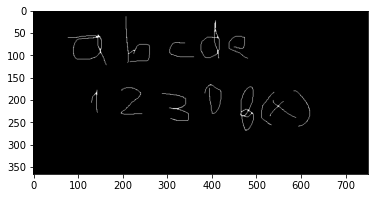

In [ ]:
kernel = np.ones((3,3),np.uint8) #A PARTIR DE 4,4 FUNCIONA MAL
erosion3 = cv.erode(thresh3,kernel,iterations = 1)
plt.imshow(erosion3,'gray')

['Q', 'l', 'a', 'c', 'd', 'e', '1', '2', '2', 'V', 'E', '&']


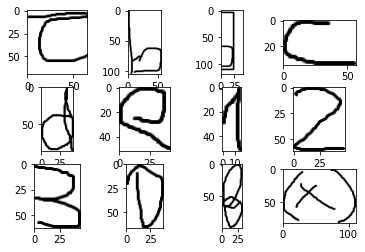

In [ ]:
#h,w = img3.shape
#print(h,w)
#boxes = tess.image_to_boxes(img3, lang='eng+equ')
#print(boxes)
#b = boxes.splitlines()
#b= b.split(' ')
#print(b)
img3 = cv.cvtColor(cv.imread('paint1.png'), cv.COLOR_BGR2GRAY)

chars_img = []
chars_txt = []
temp = []
boxes = tess.image_to_boxes(img3, lang="eng+equ")
h, w = img3.shape

for b in boxes.splitlines():
    b = b.split(' ')
    temp = np.copy(img3[h-(int(b[4])):h-(int(b[2])), int(b[1]):int(b[3])])
    chars_img.append(temp)
    chars_txt.append(b[0])
    img = cv.rectangle(img3, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
print(chars_txt)
plt.imshow(img3,'gray')

i=1
for image in chars_img:
    plt.subplot(3,4,i)
    plt.imshow(image,'gray')
    i += 1

In [ ]:
#robo un par de cosas de aca, para poner alla arriba^
img = cv2.medianBlur(img, 3)
        chars_img = []
        chars_txt = []
        temp = []
        boxes = tess.image_to_boxes(img3, lang="eng+equ")
        h, w, _ = img.shape
        if boxes:
            for b in boxes.splitlines():
                b = b.split(' ')
                temp = np.copy(img[h-(int(b[4])):h-(int(b[2])), int(b[1]):int(b[3])])
                chars_img.append(temp)
                chars_txt.append(b[0])
                img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
            print(chars_txt)
        else:
            print("nothing found")
        while True:
            cv2.imshow('Canvas', img)
            i=0
            for char in chars_img:
                i = i+1
                cv2.imshow("Character" + str(i), char)
            if cv2.waitKey(20) & 0xFF == ord('q'):
                break

IndentationError: unexpected indent (<ipython-input-192-c24daab4b664>, line 3)

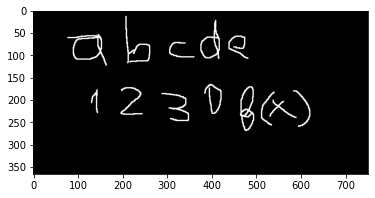

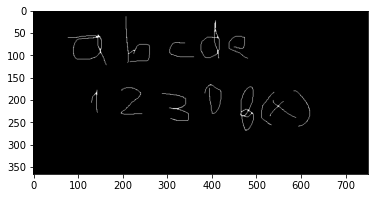

resultados:


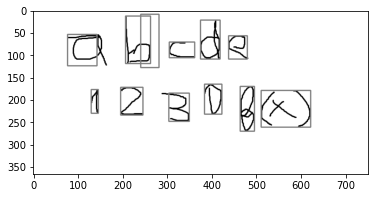

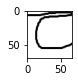

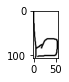

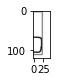

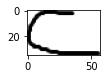

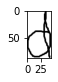

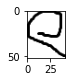

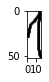

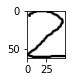

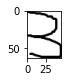

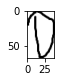

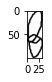

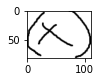

resultados:


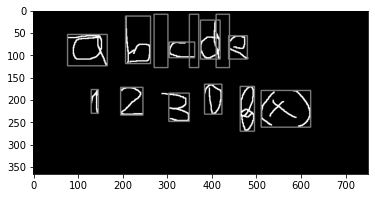

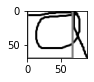

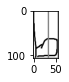

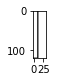

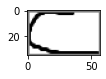

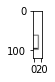

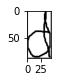

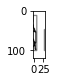

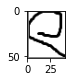

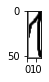

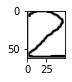

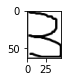

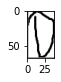

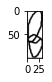

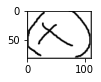

resultados:


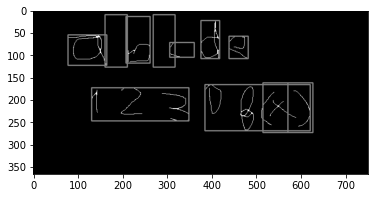

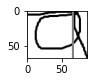

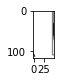

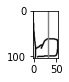

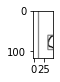

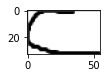

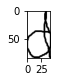

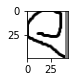

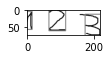

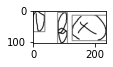

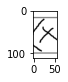

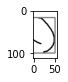

In [ ]:
#so: pareciera que anda mejor sin filtros...
img = cv.cvtColor(cv.imread('paint1.png'), cv.COLOR_BGR2GRAY)

_,thresh = cv.threshold(img,220,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C) #o THRESH:BINARY_INV; el '220' es aprox, a ojo
plt.imshow(thresh,'gray')
plt.show()

kernel = np.ones((3,3),np.uint8) #A PARTIR DE 4,4 FUNCIONA MAL
erosion = cv.erode(thresh,kernel,iterations = 1)
plt.imshow(erosion,'gray')
plt.show()

filtros = [img,thresh,erosion]
for filtro in filtros:
    chars_img = []
    temp = []
    boxes = tess.image_to_boxes(filtro, lang="eng+equ")
    h, w = img.shape
    for b in boxes.splitlines():
        b = b.split(' ')
        temp = np.copy(img[h-(int(b[4])):h-(int(b[2])), int(b[1]):int(b[3])])
        filtro = cv.rectangle(filtro, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (127, 127, 127), 2)
        chars_img.append(temp)

    print('resultados:')
    plt.imshow(filtro,'gray')
    plt.show()
    i=1
    for image in chars_img:
        plt.subplot(4,4,i)
        plt.imshow(image,'gray')
        i += 1
        plt.show()

resultados:


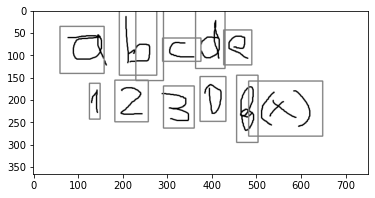

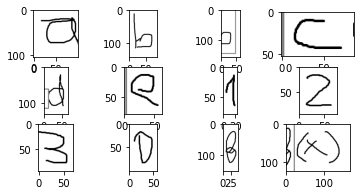

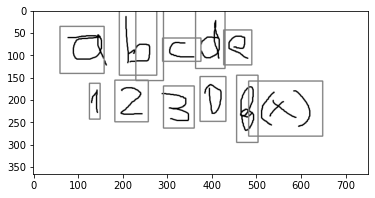

In [ ]:
img = cv.cvtColor(cv.imread('paint1.png'), cv.COLOR_BGR2GRAY)

chars_img = []
temp = []
boxes = tess.image_to_boxes(img, lang="eng+equ")
h, w = img.shape
img_con_boxes = img
for b in boxes.splitlines():
    b = b.split(' ')
    ampliar = 1.5
    box_height = (int(b[4])-int(b[2]))*ampliar
    avg_height = ((h-int(b[4]))+(h-int(b[2])))/2
    box_width = (int(b[3])-int(b[1]))*ampliar
    avg_width = (int(b[3])+int(b[1]))/2
    x1 = int(avg_height - box_height/2)
    x2 = int(avg_height + box_height/2)
    y1 = int(avg_width - box_width/2)
    y2 = int(avg_width + box_width/2)
    if x1<0:
        x1=0
    if x2>h:
        x2=h
    if y1<0:
        y1=0
    if y2>w:
        y2=w
    temp = np.copy(img[x1:x2,y1:y2])
    img_con_boxes = cv.rectangle(img_con_boxes, (y1,x2),(y2,x1), (127, 127, 127), 2)
    #no entiendo por que me dibuja los rectangulos en 'img', en vez de solo en 'img_con_boxes'
    chars_img.append(temp)

print('resultados:')
plt.imshow(img_con_boxes,'gray')
plt.show()
i=1
for image in chars_img:
    plt.subplot(4,4,i)
    plt.imshow(image,'gray')
    i += 1
plt.show()

plt.imshow(img,'gray')

resultados:


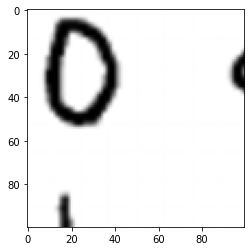

In [ ]:
#So: encontre algo raro aca.
#Para ciertos tamaños de img, se rompe el image_to_boxes del tesseract:
#Por ej, en 400x400 o 450x450 funciona, pero en 100x100 no devuelve boxes, y en 500x500 devuelve boxes vacias
#Aiuda

tamaños = [100,200,400,450,500,700]
for tamaño in tamaños:
    img = cv.cvtColor(cv.imread('nros1.png'), cv.COLOR_BGR2GRAY)
    img = img[:tamaño,:tamaño]
    chars_img = []
    temp = []
    boxes = tess.image_to_boxes(img, lang="eng+equ")
    h, w = img.shape
    img_con_boxes = img
    for b in boxes.splitlines():
        b = b.split(' ')
#        ampliar = 1.5
#        box_height = (int(b[4])-int(b[2]))*ampliar
#        avg_height = ((h-int(b[4]))+(h-int(b[2])))/2
#        box_width = (int(b[3])-int(b[1]))*ampliar
#        avg_width = (int(b[3])+int(b[1]))/2
#        x1 = int(avg_height - box_height/2)
#        x2 = int(avg_height + box_height/2)
#        y1 = int(avg_width - box_width/2)
#        y2 = int(avg_width + box_width/2)
#        if x1<0:
#            x1=0
#        if x2>h:
#            x2=h
#        if y1<0:
#            y1=0
#        if y2>w:
#            y2=w
#        temp = np.copy(img[x1:x2,y1:y2])
#        img_con_boxes = cv.rectangle(img_con_boxes, (y1,x2),(y2,x1), (127, 127, 127), 2)
        temp = np.copy(img[h-(int(b[4])):h-(int(b[2])), int(b[1]):int(b[3])])
        img_con_boxes = cv.rectangle(img_con_boxes, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
        #no entiendo por que me dibuja los rectangulos en 'img', en vez de solo en 'img_con_boxes'
        chars_img.append(temp)

    print('resultados:')
    plt.imshow(img_con_boxes,'gray')
    plt.show()
    #print('tamaño de una box cualquiera:',np.shape(chars_img[2]))
    i=1
    #for image in chars_img:
    #    plt.subplot(4,4,i)
    #    plt.imshow(image,'gray')
    #    i += 1
    #plt.show()
    #plt.imshow(img,'gray')
    plot_subimg(chars_img,grilla=False)

In [ ]:
np.shape(chars_img) #para img[:100,:100], me da 0 boxes

(0,)

In [ ]:
#A PARTIR DE ACA ESTA LO 'UTIL':

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Users\Patri\AppData\Local\Tesseract-OCR\tesseract.exe'
# ^es la forma que encontre de que me ande el tess, perdon por lo bruto :)

#ejemplo de archivo: 'paint1.png'
def import_grayscale_img(archivo):
    img = cv.cvtColor(cv.imread(archivo), cv.COLOR_BGR2GRAY)
    return img

def box_params(h,w,b,ampliar):
    #b es un vector con strings tipo '100', '78'
    #prepara los x,y de las bounding boxes
    box_height = (int(b[4])-int(b[2]))*ampliar
    avg_height = ((h-int(b[4]))+(h-int(b[2])))/2
    box_width = (int(b[3])-int(b[1]))*ampliar
    avg_width = (int(b[3])+int(b[1]))/2
    x1 = int(avg_height - box_height/2)
    x2 = int(avg_height + box_height/2)
    y1 = int(avg_width - box_width/2)
    y2 = int(avg_width + box_width/2)
    if x1<0:
        x1=0
    if x2>h:
        x2=h
    if y1<0:
        y1=0
    if y2>w:
        y2=w
    return x1,x2,y1,y2

def get_boxes(img,ampliar=1,plot=False,grilla=False):
#dada una img, separa los caracteres cada uno en otra image.
#el 'ampliar' es xq a veces, tesseract hace las boxes muy pegadas al caracter.
#Puede servir ponerlo en 1.2, 1.5 aprox
    chars_img = []
    temp = []
    boxes = tess.image_to_boxes(img, lang="eng+equ")
    h, w = img.shape
    for b in boxes.splitlines():
        b = b.split(' ')
        x1,x2,y1,y2 = box_params(h,w,b,ampliar)
        temp = np.copy(img[x1:x2,y1:y2])
        chars_img.append(temp)
    if plot==True:
        plot_img(img)  
        plot_subimg(chars_img,grilla=grilla)
    return chars_img


def plot_img(img):
    plt.imshow(img,'gray')
    plt.show()
    
    
def plot_subimg(subimg_array,grilla=False):
    if grilla==True:
        a = int(np.ceil(np.sqrt(np.shape(subimg_array)[0])))
        i=1
        for image in subimg_array:
            plt.subplot(a,a,i)
            plt.imshow(image,'gray')
            i += 1
        plt.show()
    else:
        for image in subimg_array:
            plt.imshow(image,'gray')
            plt.show()
    

def resize_boxes(h,w,img,write=False,name='prueba1.png'):
    out_img = cv.resize(img,(h,w))
    if write==True:
        cv.imwrite(name,out_img)
    return out_img

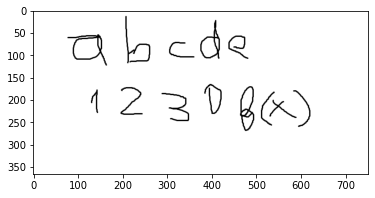

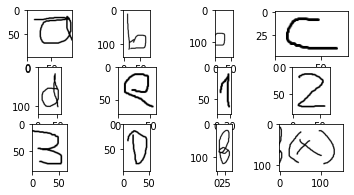

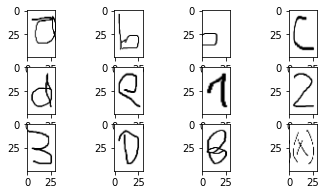

In [ ]:
img = import_grayscale_img('paint1.png')
chars_img = get_boxes(img,1.4,plot=True,grilla=True)
out_img = []
i=1
for char_img in chars_img:
    name= 'caracter'+str(i)+'.png'
    i+=1
    temp = resize_boxes(30,50,char_img,write=False,name=name)
    #guarda que si write=True, te guarda por separado todos los caracteres q encuentra
    out_img.append(temp)
plot_subimg(out_img,grilla=True)
